<a href="https://colab.research.google.com/github/clferreira1985/Python/blob/main/Mercado_livre/estudo_de_caso_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pacotes utilizados



In [31]:
import pandas as pd
import matplotlib.pyplot as plt



####Leitura dos dados

In [32]:
df = pd.read_csv('Sales_data.csv')

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [34]:
df.shape

(186850, 6)

In [35]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [36]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [37]:
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Verificando os valores ausentes (missing values)

In [39]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

###### OBS.: No caso atual só irei extrair os valores nulos (The current case I will only extract the values missing)

In [40]:
df.dropna(inplace=True)

In [41]:
df.duplicated().sum()

618

## Quais são os principais insight que foram retirados dos dados?



#### Análise 1: Qual foi o melhor mês para vendas? Quanto foi ganho nesse mês?
Analysis 1 - Which month was the best for sales? How much was earned this month?

In [42]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [43]:
df=df[df['Order Date'].str[0:2] != 'Or']
df['Month'].astype('int32')

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185950, dtype: int32

In [44]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [45]:
look_up={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May',
         '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
df['Month']=df['Month'].apply(lambda x: look_up[x])

<ipython-input-45-ab3cff89172c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Month'].apply(lambda x: look_up[x])


In [46]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [48]:
# Convertendo os valores objects em float
df['Quantity Ordered']=df['Quantity Ordered'].astype('float')
df['Price Each']=df['Price Each'].astype('float')
df['Sales'] = df['Quantity Ordered'] + df['Price Each']

In [49]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,601.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,12.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,12.99


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Sales             185950 non-null  float64
dtypes: float64(3), object(5)
memory usage: 12.8+ MB


In [51]:
highest_sale=df.groupby('Month').sum()
highest_sale.head(10)

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3367671.02,3388229.02
Aug,13448.0,2230345.42,2243793.42
Dec,28114.0,4588415.41,4616529.41
Feb,13449.0,2188884.72,2202333.72
Jan,10903.0,1811768.38,1822671.38
Jul,16072.0,2632539.56,2648611.56
Jun,15253.0,2562025.61,2577278.61
Mar,17005.0,2791207.83,2808212.83
May,18667.0,3135125.13,3153792.13


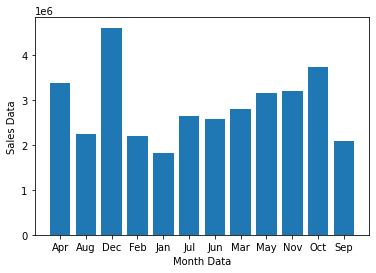

In [52]:
plt.figure()
plt.bar(highest_sale.index, highest_sale['Sales'])
plt.xlabel('Month Data')
plt.ylabel('Sales Data')
plt.show()

#### Análise 2: Qual cidade vendeu mais produtos
Analysis 2 - Which City sold more products?

In [53]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99


In [54]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99,Boston


In [55]:
city_sold=df.groupby('City').sum()
city_sold.head(10)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2779908.20,2796510.20
Austin,11153.0,1809873.61,1821026.61
Boston,22528.0,3637409.77,3659937.77
Dallas,16730.0,2752627.82,2769357.82
Los Angeles,33289.0,5421435.23,5454724.23
New York City,27932.0,4635370.83,4663302.83
Portland,14053.0,2307747.47,2321800.47
San Francisco,50239.0,8211461.74,8261700.74
Seattle,16553.0,2733296.01,2749849.01


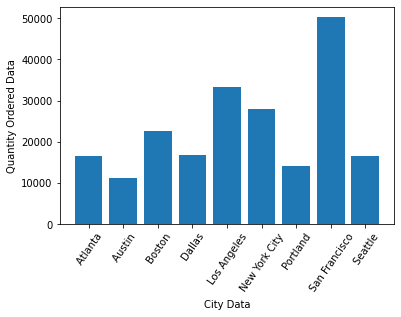

In [56]:

plt.bar(city_sold.index, city_sold['Quantity Ordered'])
plt.xticks(rotation=55)
plt.xlabel('City Data')
plt.ylabel('Quantity Ordered Data')
plt.show()

#### Análise 3: A que horas devemos exibir os anúncios para maximizar a probabilidade de o cliente comprar produtos?
Analysis 3 - What time we must publish ads to rise the probability to clients buys products? 


In [57]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99,Boston


In [58]:
df['Time']=df['Order Date'].str[-6:-3]
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99,Boston,22


In [59]:
time_data=df.groupby('Time').sum()
time_data.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Time,,,
19,14470.0,2398588.31,2413058.31
12,14202.0,2299876.68,2314078.68
11,14005.0,2288855.18,2302860.18
20,13768.0,2268185.16,2281953.16
18,13802.0,2207696.93,2221498.93
13,13685.0,2139743.86,2153428.86
17,12229.0,2116777.02,2129006.02
14,12362.0,2072194.77,2084556.77
21,12244.0,2030763.83,2043007.83


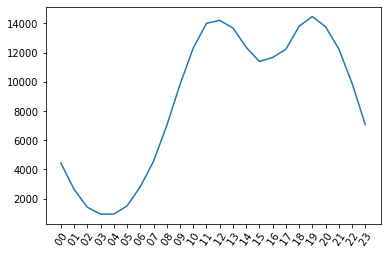

In [60]:
plt.plot(time_data.index, time_data['Quantity Ordered'])
plt.xticks(rotation=55)
plt.show()

#### Análise 4: Quais produtos mais vendidos juntos?
Analysis 4 - What are products more sales together?

In [61]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,601.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,12.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,12.99,Los Angeles,09


In [62]:
duplicated_data = df[df['Order ID'].duplicated(keep=False)]
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,601.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,12.99,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,601.00,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,12.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,100.99,Boston,11


In [63]:
from pandas.core.indexes.multi import duplicated
duplicated_data['Product_bundle']=duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated_data.head()

<ipython-input-63-971277b3ea3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_data['Product_bundle']=duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,601.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,12.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,601.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,12.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,100.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [64]:
duplicated_data=duplicated_data[['Order ID', 'Product_bundle']].drop_duplicates()
duplicated_data.head()

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [65]:
from itertools import combinations
from collections import Counter

In [66]:
count=Counter()
for row in duplicated_data['Product_bundle']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,3)))
count.most_common(20)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'),
  4),
 (('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'), 3),
 (('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'), 3),
 (('iPhone', 'Light

#### Análise 5: Qual produto mais vendeu? Porque você acha que isso aconteceu?
Analysis 5 - Which products are more sold? Why it happened it?

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,13.95,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,100.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,601.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,12.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,12.99,Los Angeles,09


In [68]:
product_max=df.groupby('Product').sum()
product_max.sort_values(by=['Sales'], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,4728.0,8030800.00,8035528.00
iPhone,6849.0,4789400.00,4796249.00
ThinkPad Laptop,4130.0,4127958.72,4132088.72
Google Phone,5532.0,3315000.00,3320532.00
27in 4K Gaming Monitor,6244.0,2429637.70,2435881.70
34in Ultrawide Monitor,6199.0,2348718.19,2354917.19
Apple Airpods Headphones,15661.0,2332350.00,2348011.00
Flatscreen TV,4819.0,1440000.00,1444819.00
Bose SoundSport Headphones,13457.0,1332366.75,1345823.75


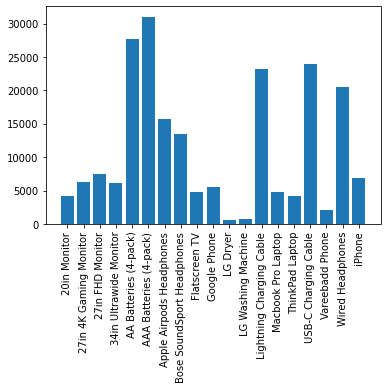

In [69]:
plt.figure()
plt.bar(product_max.index, product_max['Quantity Ordered'])
plt.xticks(rotation=90)
plt.show()

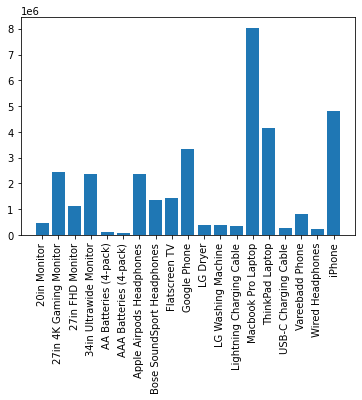

In [70]:
plt.figure()
plt.bar(product_max.index, product_max['Sales'])
plt.xticks(rotation=90)
plt.show()